In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import os
import csv
from pydub import AudioSegment
from pydub import scipy_effects
import struct
from dateutil.parser import parse
from dateutil.tz import gettz
import matplotlib.pyplot as plt
import sys
%matplotlib inline

# NSB

In [2]:
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

def lookup_convert_utc(s, time_zone = 'America/New_York'):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    utc = {date: parse(date + ' LC', tzinfos = {'LC': gettz(time_zone)}).astimezone(gettz('UTC')) for date in s.unique()}
    return s.map(utc)

In [3]:
NSB = pd.read_csv(os.getcwd() + '/Data/JFK Anomaly Scores 2017-Only NSB7-0_9 20170620 Public.csv', header=0,
                  usecols=[0,3,4,5,6,8,9,11,12,13,23], 
                  names = ['Date', 'ArrThdTime', 'ArrThdHour', 'EstDest', 'LNDRwy', 'AcType', 'Carrier',
                           'WeightClass', 'PerfCat', 'CarrierType', 'Scores'])

In [4]:
NSB['UTC_TIME'] = lookup_convert_utc(NSB['ArrThdTime'])

In [5]:
NSB['UTC_month'] = NSB.UTC_TIME.apply(lambda x: x.month)
NSB['UTC_day'] = NSB.UTC_TIME.apply(lambda x: x.day)
NSB['UTC_hour'] = NSB.UTC_TIME.apply(lambda x: x.hour)
NSB['log_score'] = np.log(NSB.Scores)

In [6]:
NSB.head(1)

,Date,ArrThdTime,ArrThdHour,EstDest,LNDRwy,AcType,Carrier,WeightClass,PerfCat,CarrierType,Scores,UTC_TIME,UTC_month,UTC_day,UTC_hour,log_score
0,20170101,1/1/2017 8:26,8,JFK,22L,E55P,EJA,1692.76,U,J,0.00003,2017-01-01 13:26:00+00:00,1,1,13,-10.407669


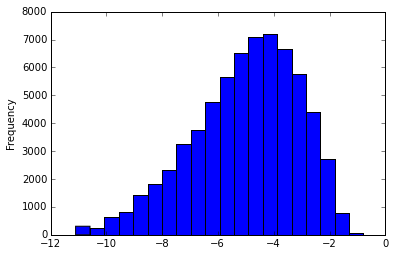

In [7]:
NSB.log_score.plot.hist(bins=20)

In [24]:
NSB.loc[NSB.log_score<-8].groupby(['UTC_month', 'UTC_day']).log_score.count().reset_index().sort_values(by='log_score', ascending = False)

,UTC_month,UTC_day,log_score
106,4,19,175
82,3,26,115
112,4,25,108
97,4,10,100
63,3,7,96
74,3,18,93
117,4,30,87
9,1,10,86
91,4,4,85
56,2,28,79


In [32]:
NSB.loc[(NSB.UTC_month == 4) & (NSB.UTC_day == 19),:].groupby(['UTC_hour']).log_score.agg(['mean','count']).reset_index().sort_values(by='mean', ascending = True)

,UTC_hour,mean,count
10,10,-8.076573,28
8,8,-7.479545,8
13,13,-7.474784,16
18,18,-7.470788,35
23,23,-7.428969,30
19,19,-7.392570,20
14,14,-7.318589,19
17,17,-7.306212,35
15,15,-7.301336,23
12,12,-7.272825,20


In [38]:
NSB.loc[(NSB.UTC_month == 4) & (NSB.UTC_day == 19),['ArrThdTime', 'UTC_hour', 'log_score', 'LNDRwy', 'AcType', 'Carrier']].sort_values(by='UTC_hour')

,ArrThdTime,UTC_hour,log_score,LNDRwy,AcType,Carrier
58862,4/18/2017 20:34,0,-11.100816,13R,B739,DAL
58963,4/18/2017 20:57,0,-7.699618,13L,CRJ9,EDV
59054,4/18/2017 20:15,0,-6.495646,13L,B752,AAL
59041,4/18/2017 20:28,0,-6.646469,13L,B738,AAL
59020,4/18/2017 20:38,0,-6.838136,13L,B77W,BAW
59014,4/18/2017 20:19,0,-6.896123,13L,A388,KAL
58919,4/18/2017 20:34,0,-8.390561,13L,A321,AAL
58921,4/18/2017 20:48,0,-8.326573,13L,E145,LOF
59009,4/18/2017 20:25,0,-6.990051,13L,A321,JBU
59202,4/18/2017 20:14,0,-5.034705,13L,B738,DAL


# Load Voice

In [2]:
sound1 = AudioSegment.from_mp3(os.getcwd() + '/AudioDownload/Tower/' + "KJFK-Twr-Apr-19-2017-1800Z.mp3")
sound2 = AudioSegment.from_mp3(os.getcwd() + '/AudioDownload/Tower/' + "KJFK-Twr-Apr-19-2017-1830Z.mp3")
sound = sound1.append(sound2)
# sound = sound1 + sound2
print(sound.frame_width)
print(sound.duration_seconds)
print(sound.frame_rate)
sample_rate = sound.frame_rate

2
3807.92594104
22050


In [3]:
sound_track = sound.get_array_of_samples()

In [4]:
def VisualizeVoice(sound_track, start_sec = 0, end_sec = 300, sample_rate = sample_rate):
    t = np.linspace(start_sec, end_sec, (end_sec - start_sec) * sample_rate)
    
    plt.figure(figsize=(18,12))
    ax1 = plt.subplot(211)
    ax1.plot(t, sound_track[int(start_sec * sample_rate): int(end_sec * sample_rate)])
    ax1.set_xlabel('Elapsed time since audio starts/sec')
    ax1.set_ylabel('Audio')

    ax2 = plt.subplot(212, sharex = ax1)
    Pxx, freqs, time_ins, im = ax2.specgram(sound_track[int(start_sec * sample_rate): int(end_sec * sample_rate)], 
                                        Fs = sample_rate, NFFT = 256, noverlap = 128, xextent = (start_sec, end_sec),
                                        mode = 'psd')
    plt.colorbar(im, orientation='horizontal')
    ax2.set_xlabel('Elapsed time since audio starts/sec')
    ax2.set_ylabel('Frequency (Hz)')
#     ax3 = plt.subplot(313, sharex = ax1)
    plt.show()
    return Pxx, freqs, time_ins, im

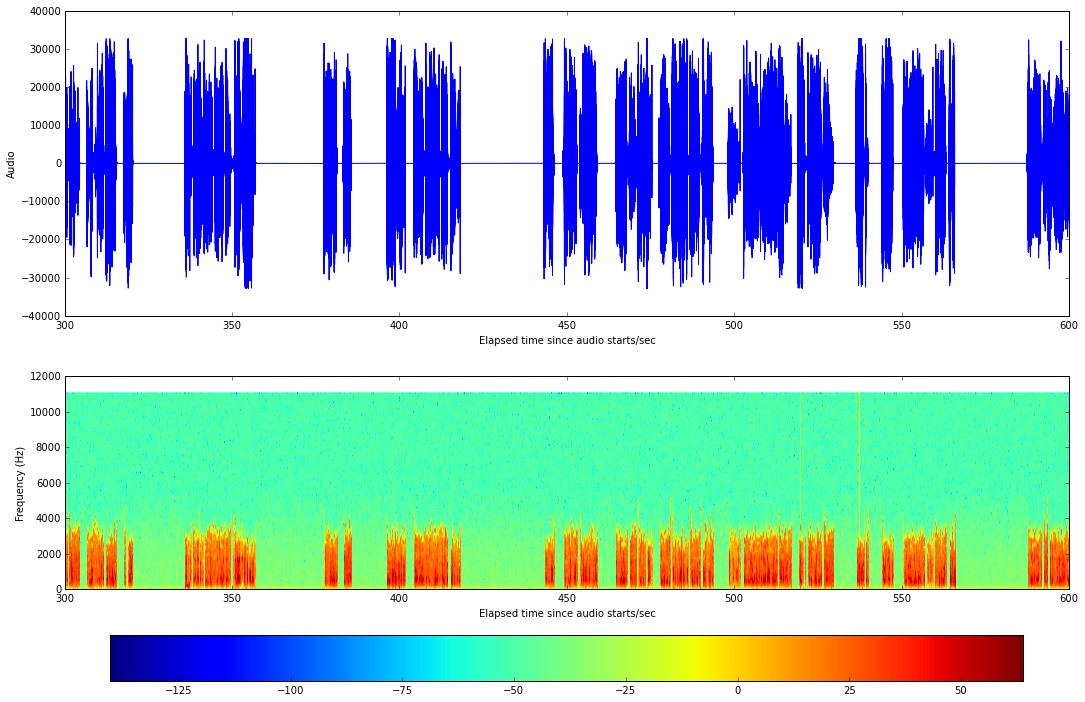

In [14]:
out = VisualizeVoice(sound_track, start_sec = 300, end_sec = 600, sample_rate = sample_rate)